In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
dataset = pd.read_csv('winequality-white.csv')
print(dataset.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [42]:
ds = dataset.iloc[:, [1,4,7,10]]
print (ds.head())
x = dataset.iloc[:, [1,4,7,10]].values
print(type(x))
print(x[0:5,:])

   volatile acidity  chlorides  density  alcohol
0              0.27      0.045   1.0010      8.8
1              0.30      0.049   0.9940      9.5
2              0.28      0.050   0.9951     10.1
3              0.23      0.058   0.9956      9.9
4              0.23      0.058   0.9956      9.9
<class 'numpy.ndarray'>
[[ 0.27    0.045   1.001   8.8   ]
 [ 0.3     0.049   0.994   9.5   ]
 [ 0.28    0.05    0.9951 10.1   ]
 [ 0.23    0.058   0.9956  9.9   ]
 [ 0.23    0.058   0.9956  9.9   ]]


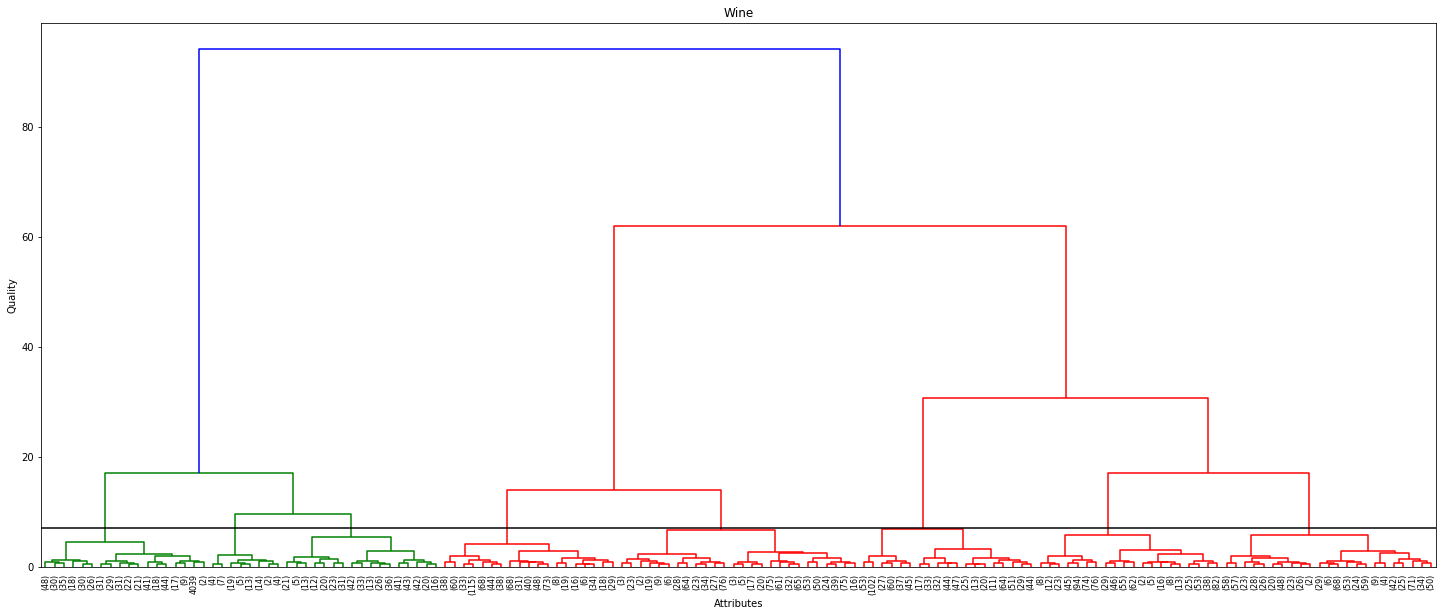

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(x, 'ward')

# set cut-off to 150 cluster merges
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Wine')
plt.xlabel('Attributes')
plt.ylabel('Quality')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

In [44]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage="ward", n_clusters=3)
clustering.fit(x);

In [45]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
y = label_encoder.fit_transform(dataset['quality'])
print(y)

[3 3 3 ... 3 4 3]


(4898, 4)


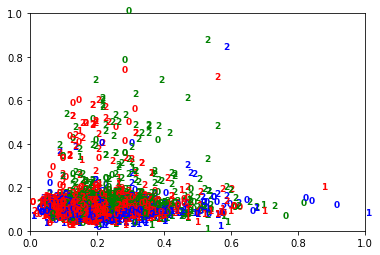

In [46]:
from sklearn import preprocessing
X_plot = preprocessing.MinMaxScaler().fit_transform(x)
print(X_plot.shape)

colours = 'rbgrbgrbgrbgrbgrbgrbg'
for i in range(x.shape[0]):
    plt.text(X_plot[i, 0], X_plot[i, 1], str(clustering.labels_[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 9}
        )

plt.show()

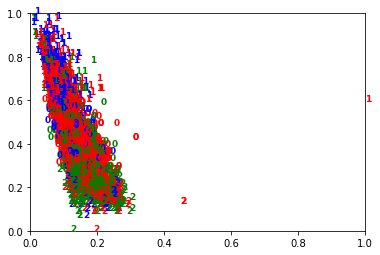

In [47]:
for i in range(x.shape[0]):
    plt.text(X_plot[i, 2], X_plot[i, 3], str(clustering.labels_[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 9}
        )

#plt.xticks([])
#plt.yticks([])
#plt.axis('off')
plt.show()

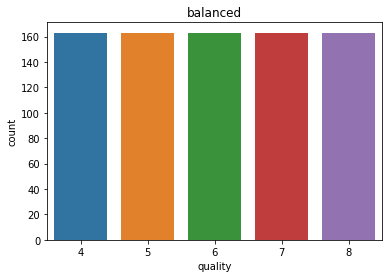

In [48]:
import seaborn as sns
# Shuffle the Dataset.
shuffled_df = dataset.sample(frac=1,random_state=4)

# Put all the minority class in a separate dataset.
q4_df = shuffled_df.loc[shuffled_df['quality'] == 4]

#Randomly select ? observations from the majority classes
q5_df = shuffled_df.loc[shuffled_df['quality'] == 5].sample(n = 163,random_state=42)

q6_df = shuffled_df.loc[shuffled_df['quality'] == 6].sample(n = 163,random_state=42)

q7_df = shuffled_df.loc[shuffled_df['quality'] == 7].sample(n = 163,random_state=42)

q8_df = shuffled_df.loc[shuffled_df['quality'] == 8].sample(n = 163,random_state=42)


# Concatenate both dataframes again
normalized_df = pd.concat([q4_df, q5_df, q6_df, q7_df, q8_df])

plt.figure()

sns.countplot('quality', data=normalized_df)

plt.title('balanced')

plt.show()

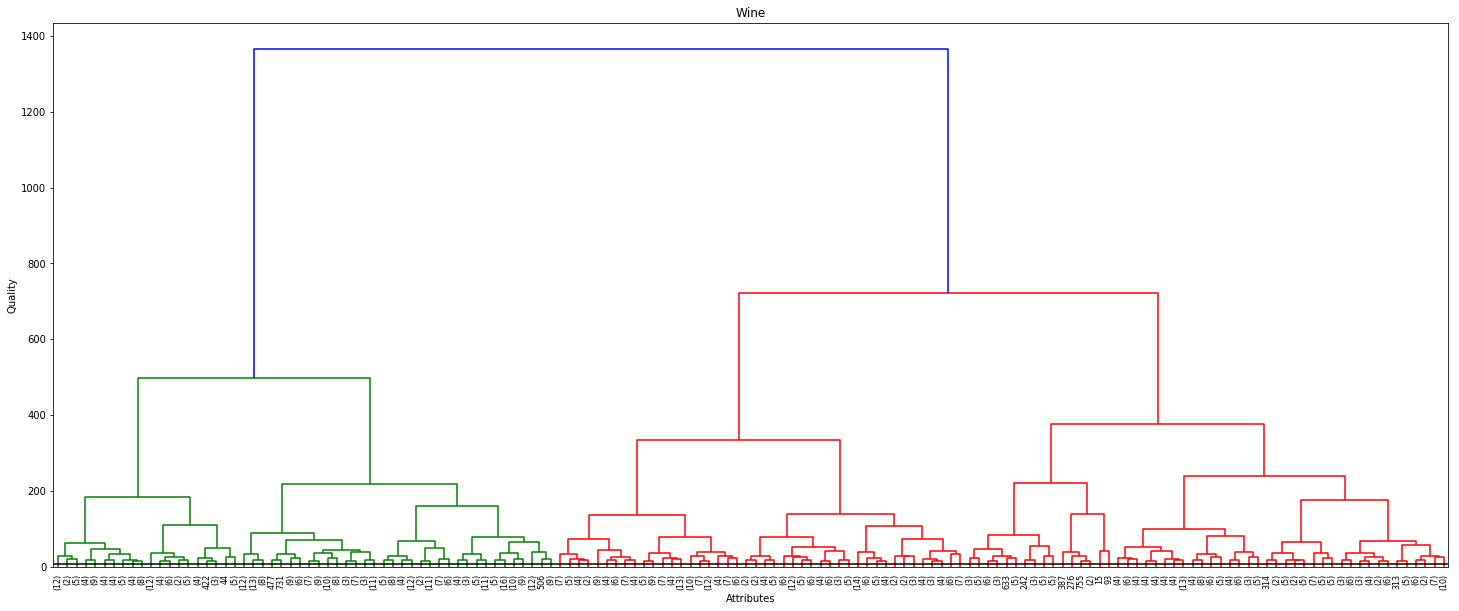

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(normalized_df, 'ward')

# set cut-off to 150 cluster merges
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Wine')
plt.xlabel('Attributes')
plt.ylabel('Quality')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

In [50]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage="ward", n_clusters=3)
clustering.fit(normalized_df);

In [51]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
y = label_encoder.fit_transform(dataset['quality'])
print(y)


[3 3 3 ... 3 4 3]


In [52]:
print(normalized_df.shape[0])

815


(815, 12)


C:\Users\Neo Wei Sheng\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


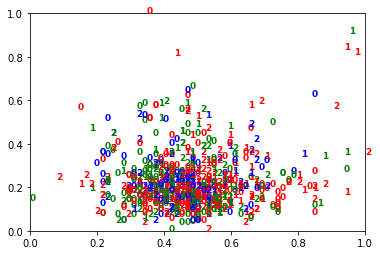

In [53]:
from sklearn import preprocessing
X_plot = preprocessing.MinMaxScaler().fit_transform(normalized_df)
print(X_plot.shape)

colours = 'rbgrbgrbgrbgrbgrbgrbg'
for i in range(normalized_df.shape[0]):
    plt.text(X_plot[i, 0], X_plot[i, 1], str(clustering.labels_[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 9}
        )

plt.show()

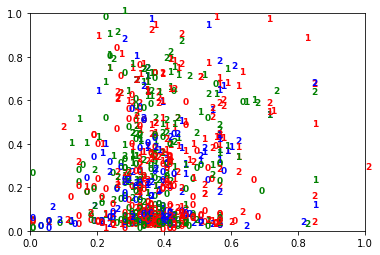

In [54]:
for i in range(normalized_df.shape[0]):
    plt.text(X_plot[i, 2], X_plot[i, 3], str(clustering.labels_[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 9}
        )

plt.show()